# Graphing #elxn43 tweet volume by day

We're using a Jupyter Notebook via the [Anaconda distribution](https://www.anaconda.com/), and we'll need to only import the following:

In [1]:
import datetime
import pandas as pd

We'll create a DataFrame to work with from `elxn43-times.txt`. This file is a derivative of the [#elxn43 dataset](https://doi.org/10.5683/SP2/QAMPPI). It can be created with [`jq`](https://stedolan.github.io/jq/) with the following command:

```
$ cat elxn43_search.jsonl | jq -r .created_at > elxn43-times.txt
```

It is also included in the repo in the `data` directory.

In [2]:
elxn43_times = pd.read_csv(
    "data/elxn43-times.txt",
    names=["utc_timestamp"],
    header=None,
    parse_dates=["utc_timestamp"],
)

Let's take a look at the DataFrame:

In [3]:
elxn43_times

,utc_timestamp
0,2019-09-10 18:53:05+00:00
1,2019-09-10 18:53:03+00:00
2,2019-09-10 18:53:02+00:00
3,2019-09-10 18:52:51+00:00
4,2019-09-10 18:52:43+00:00
5,2019-09-10 18:52:43+00:00
6,2019-09-10 18:52:41+00:00
7,2019-09-10 18:52:41+00:00
8,2019-09-10 18:52:40+00:00
9,2019-09-10 18:52:39+00:00


Next, we'll add a new column to our DataFrame which converts the `utc_timestamp` column to the date it corresponds to.

In [4]:
elxn43_times["days"] = elxn43_times["utc_timestamp"].apply(
    lambda elxn43_times: datetime.datetime(
        year=elxn43_times.year, month=elxn43_times.month, day=elxn43_times.day
    )
)

Let's take a look at the DataFrame again to see the new column:

In [5]:
elxn43_times

,utc_timestamp,days
0,2019-09-10 18:53:05+00:00,2019-09-10
1,2019-09-10 18:53:03+00:00,2019-09-10
2,2019-09-10 18:53:02+00:00,2019-09-10
3,2019-09-10 18:52:51+00:00,2019-09-10
4,2019-09-10 18:52:43+00:00,2019-09-10
5,2019-09-10 18:52:43+00:00,2019-09-10
6,2019-09-10 18:52:41+00:00,2019-09-10
7,2019-09-10 18:52:41+00:00,2019-09-10
8,2019-09-10 18:52:40+00:00,2019-09-10
9,2019-09-10 18:52:39+00:00,2019-09-10


Finally, let's create a bar chart, and make it look nice. We'll first format the x-axis dates, then create the chart, then add a title, labels, and the formated x-axis dates.

[Text(0, 0, 'Sep 01'),
 Text(0, 0, 'Sep 02'),
 Text(0, 0, 'Sep 03'),
 Text(0, 0, 'Sep 04'),
 Text(0, 0, 'Sep 05'),
 Text(0, 0, 'Sep 06'),
 Text(0, 0, 'Sep 07'),
 Text(0, 0, 'Sep 08'),
 Text(0, 0, 'Sep 09'),
 Text(0, 0, 'Sep 10'),
 Text(0, 0, 'Sep 11'),
 Text(0, 0, 'Sep 12'),
 Text(0, 0, 'Sep 13'),
 Text(0, 0, 'Sep 14'),
 Text(0, 0, 'Sep 15'),
 Text(0, 0, 'Sep 16'),
 Text(0, 0, 'Sep 17'),
 Text(0, 0, 'Sep 18'),
 Text(0, 0, 'Sep 19'),
 Text(0, 0, 'Sep 20'),
 Text(0, 0, 'Sep 21'),
 Text(0, 0, 'Sep 22'),
 Text(0, 0, 'Sep 23'),
 Text(0, 0, 'Sep 24'),
 Text(0, 0, 'Sep 25'),
 Text(0, 0, 'Sep 26'),
 Text(0, 0, 'Sep 27'),
 Text(0, 0, 'Sep 28'),
 Text(0, 0, 'Sep 29'),
 Text(0, 0, 'Sep 30'),
 Text(0, 0, 'Oct 01'),
 Text(0, 0, 'Oct 02'),
 Text(0, 0, 'Oct 03'),
 Text(0, 0, 'Oct 04'),
 Text(0, 0, 'Oct 05'),
 Text(0, 0, 'Oct 06'),
 Text(0, 0, 'Oct 07'),
 Text(0, 0, 'Oct 08'),
 Text(0, 0, 'Oct 09'),
 Text(0, 0, 'Oct 10'),
 Text(0, 0, 'Oct 11'),
 Text(0, 0, 'Oct 12'),
 Text(0, 0, 'Oct 13'),
 Text(0, 0,

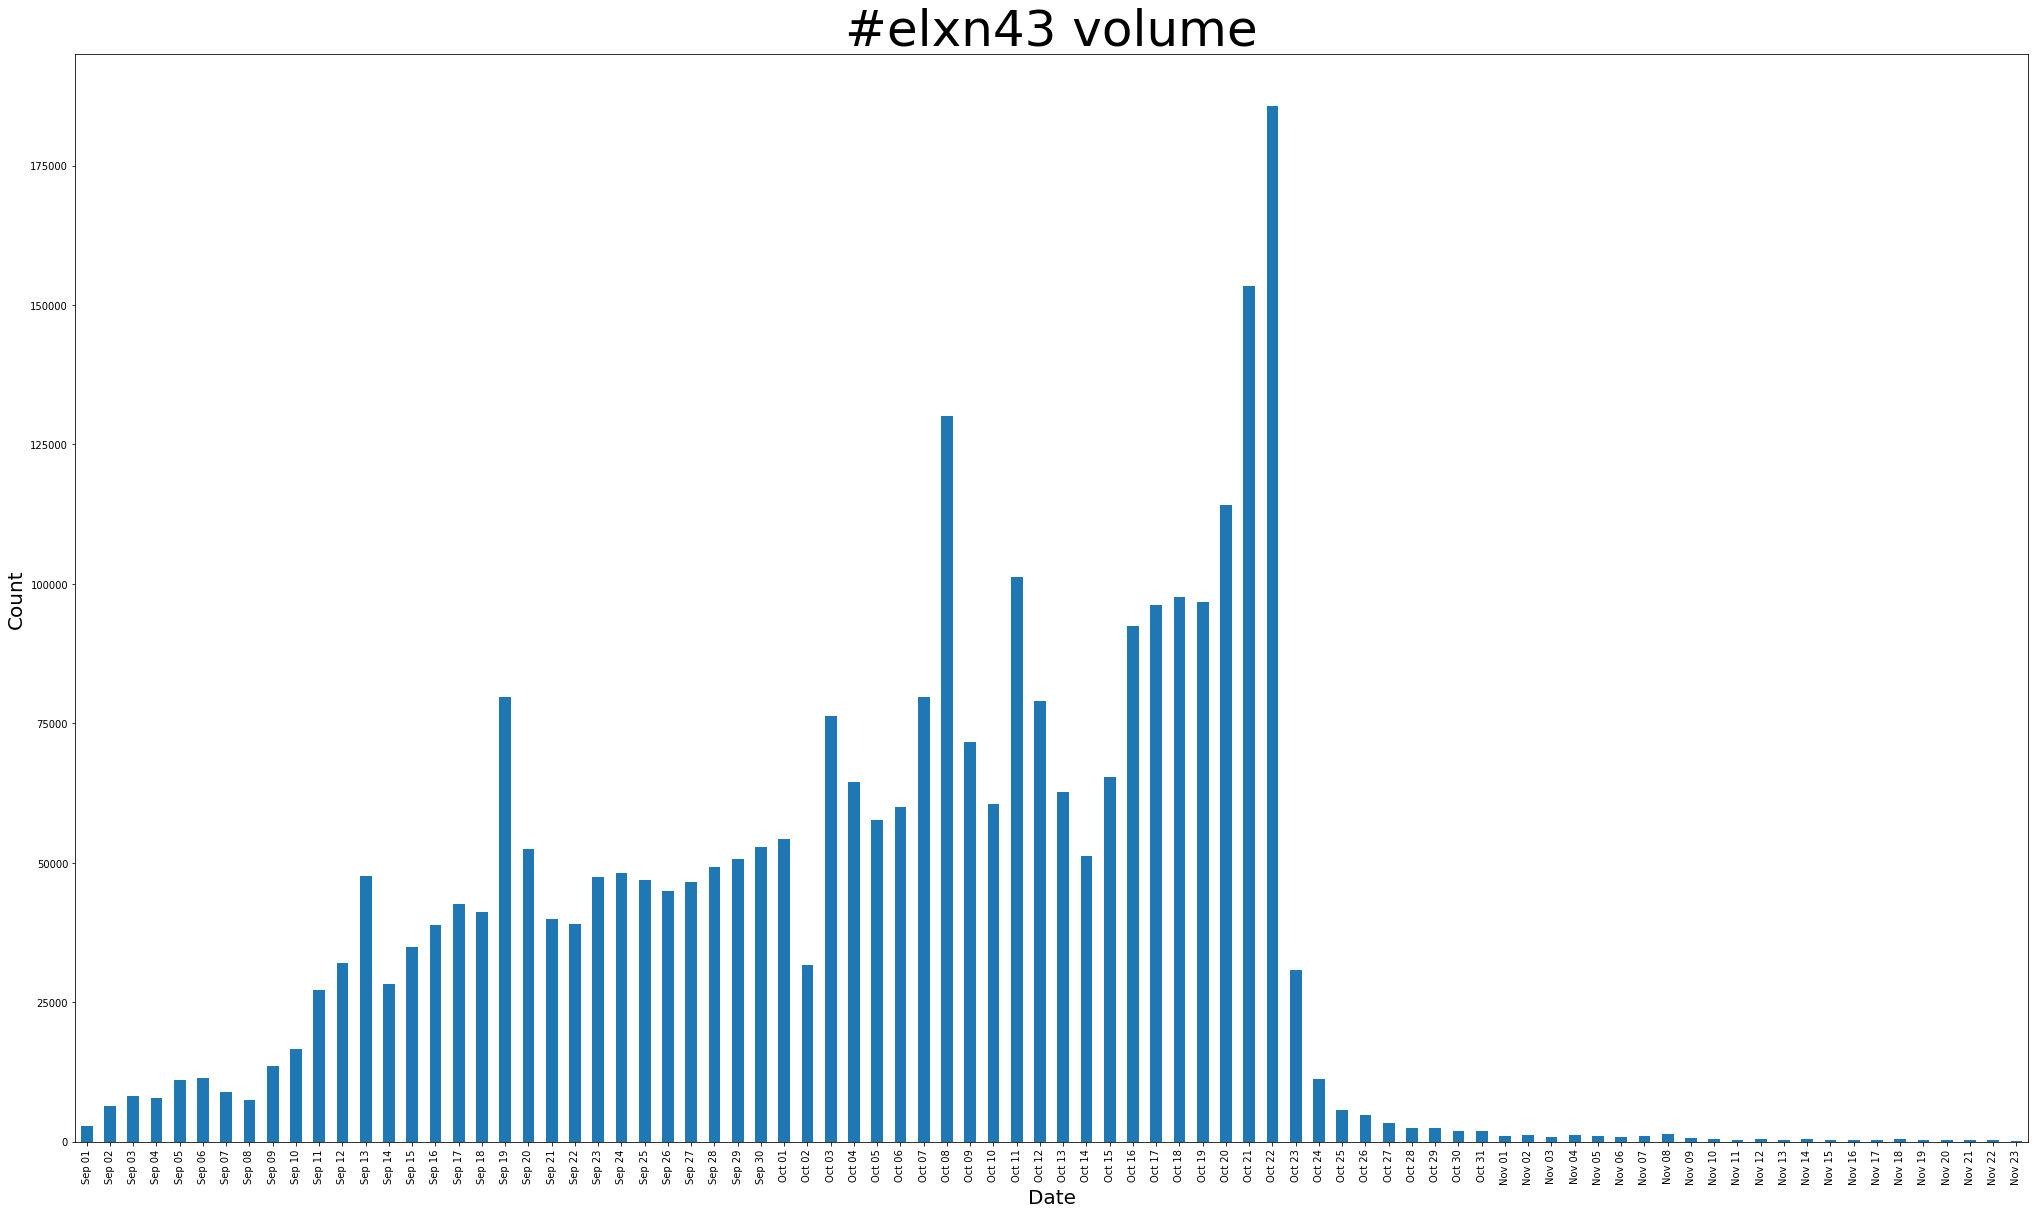

In [7]:
nice_xaxis_labels = lambda x: datetime.datetime.strptime(
    x, "%Y-%m-%d %H:%M:%S"
).strftime("%b %d")

chart = (
    elxn43_times.groupby(elxn43_times["days"])
    .count()
    .plot.bar(figsize=(35, 20), legend=False)
)

chart.set_title("#elxn43 volume", fontsize=50)
chart.set_xlabel("Date", fontsize=20)
chart.set_ylabel("Count", fontsize=20)
chart.set_xticklabels(
    [nice_xaxis_labels(x.get_text()) for x in chart.get_xticklabels()]
)